In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### Clim data upload

In [16]:
clim_rain=xr.open_dataset('D:/pai/data/monthlyclimatology/clim_rain_imd_merged_1x1_1982-2019.nc')
clim_u = xr.open_dataset('D:/pai/data/monthlyclimatology/clim_uwnd_ncep_2.5x2.5_1948-2020.nc')
clim_v = xr.open_dataset('D:/pai/data/monthlyclimatology/clim_vwnd_ncep_2.5x2.5_1948-2020.nc')
clim_slp= xr.open_dataset('D:/pai/data/monthlyclimatology/clim_slp_ncep_2.5_2.5_1948-2020.nc')
clim_T= xr.open_dataset('D:/pai/data/monthlyclimatology/clim_T_ncep_2.5x2.5_1948-2020.nc')

In [17]:
clim_rain

<xarray.Dataset>
Dimensions:    (LATITUDE: 50, LONGITUDE: 51, month: 12)
Coordinates:
  * LATITUDE   (LATITUDE) float64 -8.5 -7.5 -6.5 -5.5 ... 37.5 38.5 39.5 40.5
  * LONGITUDE  (LONGITUDE) float64 57.5 58.5 59.5 60.5 ... 105.5 106.5 107.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    rf         (month, LATITUDE, LONGITUDE) float32 ...

### Monmean 2016 and 2019 data upload

In [18]:
rain_2016=xr.open_dataset('D:/pai/data/monmean_surface/rain_monmean_imd_merged_1x1_2016.nc')
u_2016=xr.open_dataset('D:/pai/data/monmean_surface/uwnd_monmean_ncep_2.5x2.5_2016.nc')
v_2016=xr.open_dataset('D:/pai/data/monmean_surface/vwnd_monmean_ncep_2.5x2.5_2016.nc')
slp_2016=xr.open_dataset('D:/pai/data/monmean_surface/slp_monmean_ncep_2.5x2.5_2016.nc')
T_2016=xr.open_dataset('D:/pai/data/monmean_surface/airT_monmean_ncep_2.5x2.5_2016.nc')

In [19]:
rain_2019=xr.open_dataset('D:/pai/data/monmean_surface/rain_monmean_imd_merged_1x1_2019.nc')
u_2019=xr.open_dataset('D:/pai/data/monmean_surface/uwnd_monmean_ncep_2.5x2.5_2019.nc')
v_2019=xr.open_dataset('D:/pai/data/monmean_surface/vwnd_monmean_ncep_2.5x2.5_2019.nc')
slp_2019=xr.open_dataset('D:/pai/data/monmean_surface/slp_monmean_ncep_2.5x2.5_2019.nc')
T_2019=xr.open_dataset('D:/pai/data/monmean_surface/airT_monmean_ncep_2.5x2.5_2019.nc')

### Anomally for 2016

In [20]:
r_anom_2016=rain_2016.groupby('time.month')-clim_rain
u_anom_2016=u_2016.groupby('time.month')-clim_u
v_anom_2016=v_2016.groupby('time.month')-clim_v
slp_anom_2016=slp_2016.groupby('time.month')-clim_slp
T_anom_2016=T_2016.groupby('time.month')-clim_T

### Anomally for 2019

In [21]:
r_anom_2019=rain_2019.groupby('time.month')-clim_rain
u_anom_2019=u_2019.groupby('time.month')-clim_u
v_anom_2019=v_2019.groupby('time.month')-clim_v
slp_anom_2019=slp_2019.groupby('time.month')-clim_slp
T_anom_2019=T_2019.groupby('time.month')-clim_T

# Plotting anomally


## 2016

In [30]:
lon_r = r_anom_2016.LONGITUDE
lat_r = r_anom_2016.LATITUDE
lon_w = u_anom_2016.lon
lat_w = u_anom_2016.lat
lon_p = slp_anom_2016.lon
lat_p = slp_anom_2016.lat
lon_T = T_anom_2016.lon
lat_T = T_anom_2016.lat

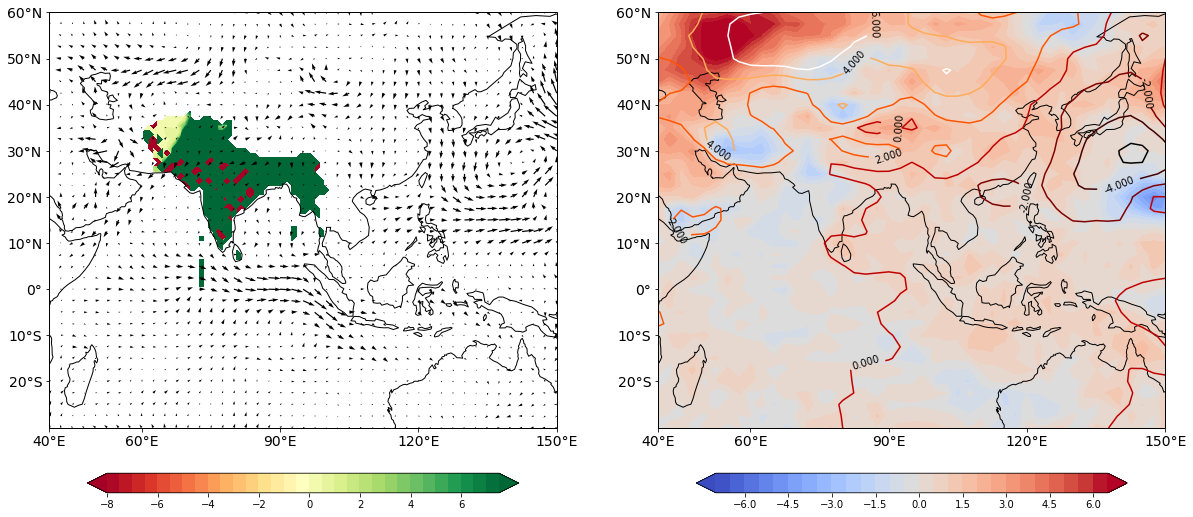

In [63]:
fig=plt.figure(figsize=[20,12])
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())     #subplot 1 with only 1 frame ,plot projecttion
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

level1=np.arange(-8,8,0.5)                                    #set your plot level
level2=np.arange(-7,7,0.5)
level3=np.arange(-6,8,2)


shrink=0.85
img_extent =[40, 150, -30, 40]                                #decide region
#**********************************************************************

ax1.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax1.coastlines()                                               #add boundary
ax1.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax1.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='both',labelsize=14)                      #decides tick's size

c = ax1.contourf(lon_r, lat_r, r_anom_2016.rf[7,:,:], extent=img_extent, cmap=cm.RdYlGn,         #plot spacial
            levels=level1, extend='both',transform=ccrs.PlateCarree())


q = ax1.quiver(lon_w,lat_w,u_anom_2016.uwnd[7,:,:],v_anom_2016.vwnd[7,:,:],cmap=cm.Blues,scale=200)           #plot wind   


plt.colorbar(c,pad=0.07,ax=ax1,shrink=shrink,orientation='horizontal')    #put the level bar
#************************************************************************

 
ax2.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax2.coastlines()                                               #add boundary
ax2.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax2.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis='both',labelsize=14)   


p = ax2.contour(lon_p,lat_p,slp_anom_2016.slp[7,:,:], 20,extent=img_extent,levels=level3,cmap="gist_heat")
plt.clabel(p, inline=True, fontsize=10, colors='black')


T= ax2.contourf(lon_T, lat_T, T_anom_2016.air[7,:,:],levels=level2,extend='both',extent=img_extent,cmap="coolwarm"
               ,transform=ccrs.PlateCarree())


plt.colorbar(T,pad=0.07,ax=ax2,shrink=shrink,orientation='horizontal')    #put the level bar


In [11]:
fig.savefig('2016_jan_anomaly.png') 0
chandrim

## 2019

In [12]:
lon_r = r_anom_2019.LONGITUDE
lat_r = r_anom_2019.LATITUDE
lon_w = u_anom_2019.lon
lat_w = u_anom_2019.lat
lon_p = slp_anom_2019.lon
lat_p = slp_anom_2019.lat
lon_T = T_anom_2019.lon
lat_T = T_anom_2019.lat

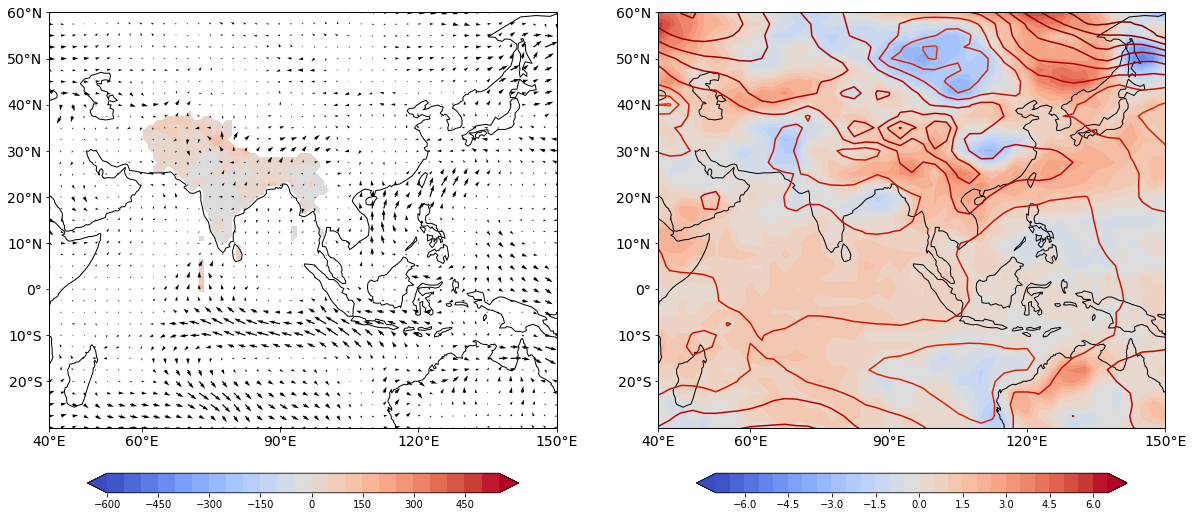

In [13]:
fig=plt.figure(figsize=[20,12])
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())     #subplot 1 with only 1 frame ,plot projecttion
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

# level1=np.arange(-600,600,50)                                    #set your plot level
# level2=np.arange(-7,7,0.5)
shrink=0.85
img_extent =[40, 150, -30, 40]                                #decide region
#**********************************************************************

ax1.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax1.coastlines()                                               #add boundary
ax1.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax1.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='both',labelsize=14)                      #decides tick's size

c = ax1.contourf(lon_r, lat_r, r_anom_2019.rf[1,:,:], extent=img_extent, cmap=cm.RdYlGn         #plot spacial
            ,levels=level1,extend='both',transform=ccrs.PlateCarree())


q = ax1.quiver(lon_w,lat_w,u_anom_2019.uwnd[1,:,:],v_anom_2019.vwnd[1,:,:],cmap=cm.Blues,scale=200)           #plot wind   


plt.colorbar(c,pad=0.07,ax=ax1,shrink=shrink,orientation='horizontal')    #put the level bar
#************************************************************************

 
ax2.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax2.coastlines()                                               #add boundary
ax2.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax2.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis='both',labelsize=14)   


p = ax2.contour(lon_p,lat_p,slp_anom_2019.slp[1,:,:], 30,extent=img_extent,cmap="gist_heat")

T= ax2.contourf(lon_T, lat_T, T_anom_2019.air[1,:,:],levels=level2,extend='both',extent=img_extent,cmap="coolwarm"
               ,transform=ccrs.PlateCarree())


plt.colorbar(T,pad=0.07,ax=ax2,shrink=shrink,orientation='horizontal')    #put the level bar


In [14]:
fig.savefig('2019_jan_anomaly.png')